# Rental Bike Prediction 

Data Set Information:

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort.
It is important to make the rental bike available and accessible to the public at the right time as 
it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes 
a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply 
of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), 
the number of bikes rented per hour and date information.


Attribute Information:

Date : year-month-day
Rented Bike count - Count of bikes rented at each hour
Hour - Hour of the day
Temperature-Temperature in Celsius
Humidity - %
Windspeed - m/s
Visibility - 10m
Dew point temperature - Celsius
Solar radiation - MJ/m2
Rainfall - mm
Snowfall - cm
Seasons - Winter, Spring, Summer, Autumn
Holiday - Holiday/No holiday
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


## Importing libraries 

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RentalBikePrediction/SeoulBikeData.csv',encoding='latin1')

In [85]:
data.head(30)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01-12-2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01-12-2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01-12-2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01-12-2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01-12-2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


### Checking for missing values 

In [86]:
data.info()# No missing values in our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

###  Correlation plot

In [87]:
data.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


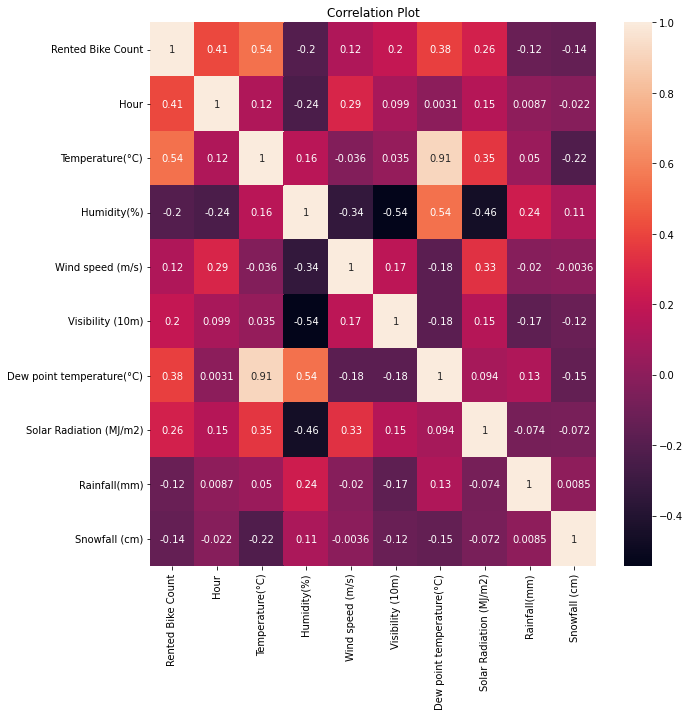

In [88]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Plot')
plt.show()

### Variable Identification 

##### There are 7 Continuous Variables and 3 Categorical Variables 

In [89]:
cont_var=data.iloc[:,1:11]

In [90]:
cont_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 684.5 KB


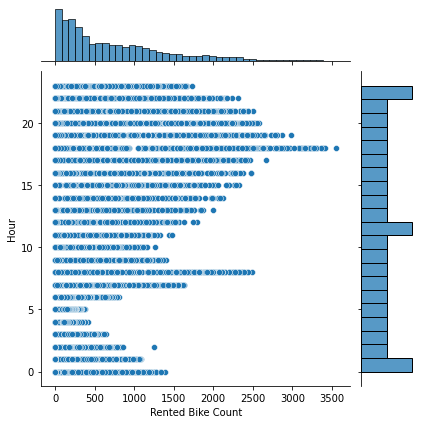

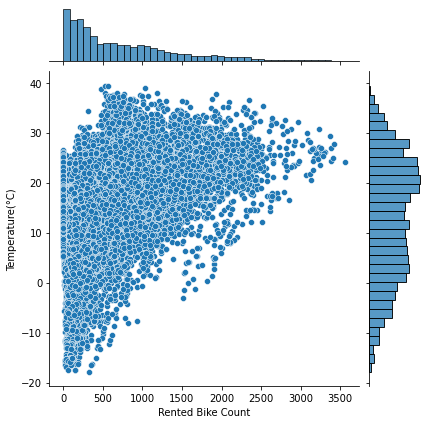

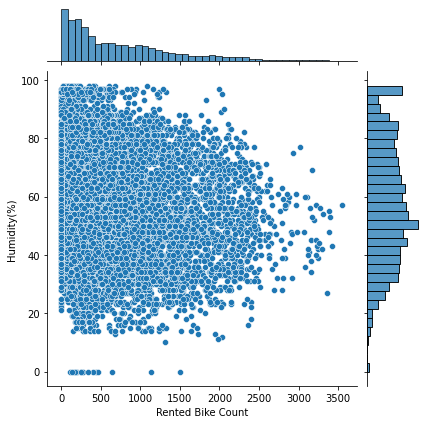

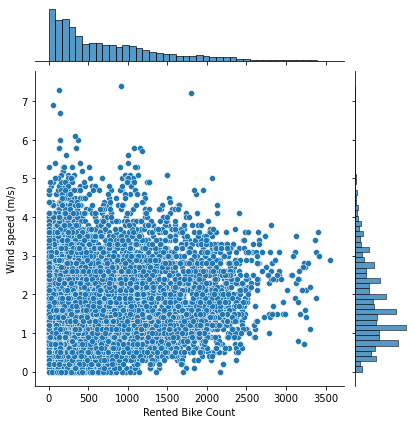

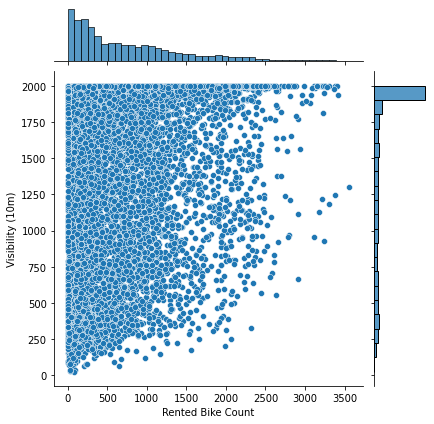

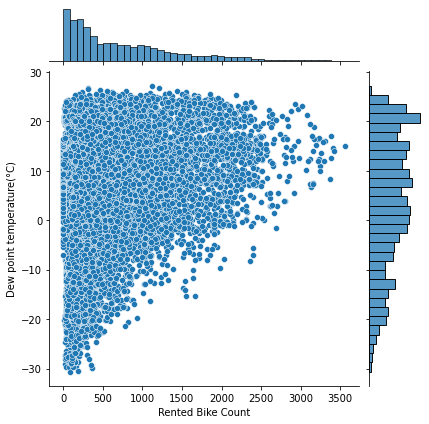

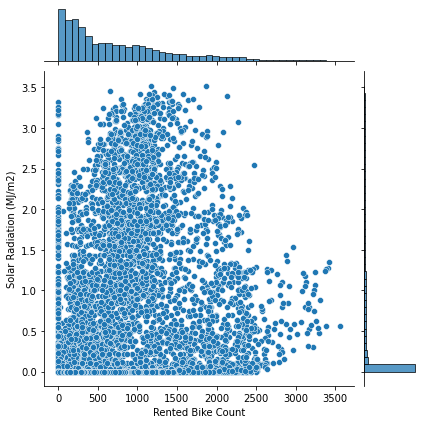

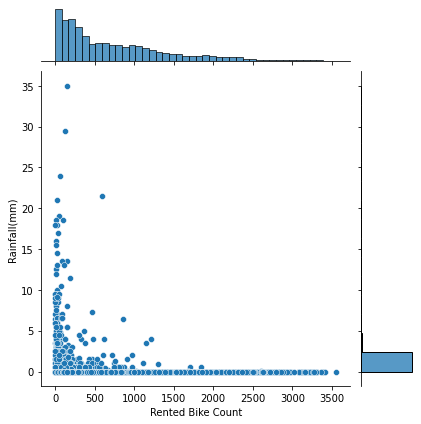

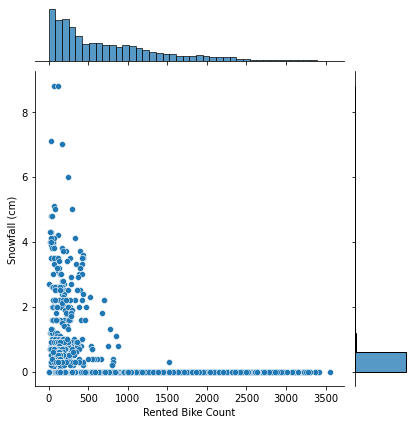

In [91]:
for i in range(0,9):
    sns.jointplot(x=cont_var.iloc[:,0],y=cont_var.iloc[:,i+1])

In [92]:
sns.pairplot(cont_var)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [93]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


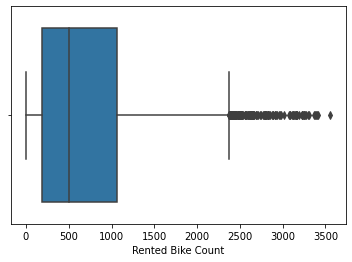

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


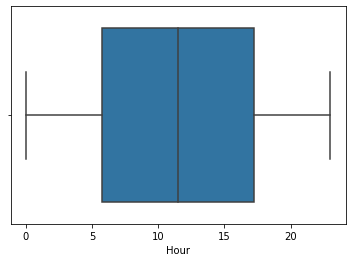

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


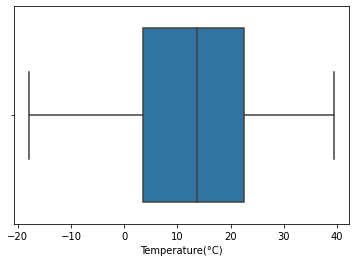

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


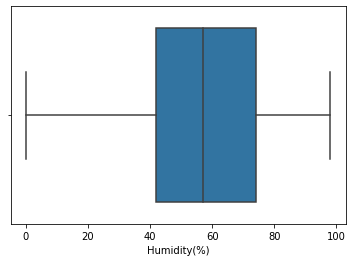

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


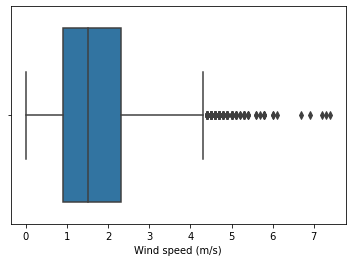

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


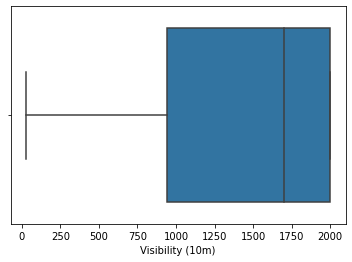

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


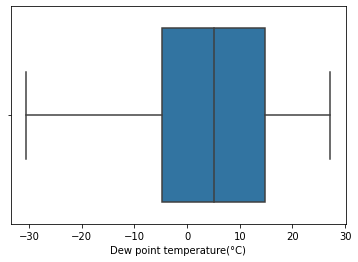

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


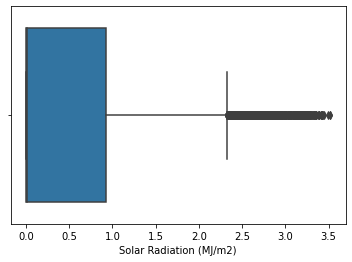

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


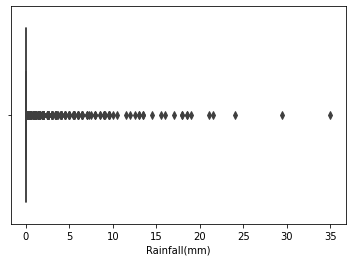

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


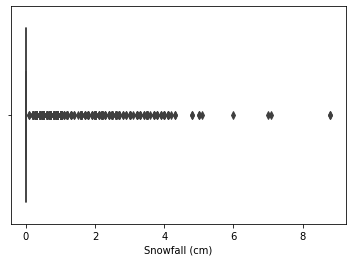

In [94]:
for i in range(0,10):
    sns.boxplot(cont_var.iloc[:,i])
    plt.show()

### Distribution of features 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


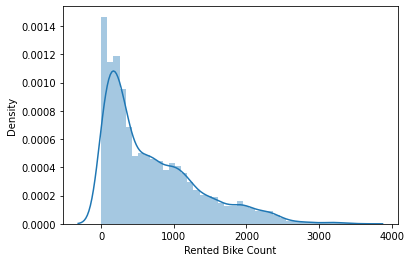

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


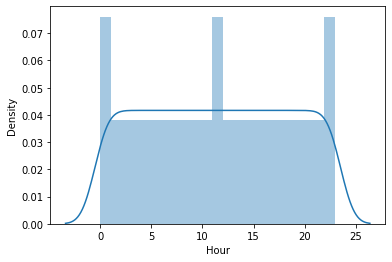

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


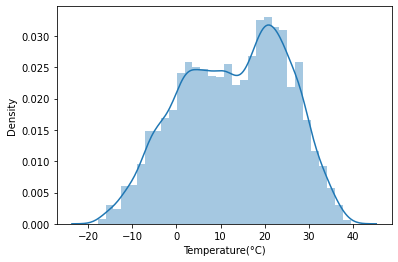

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


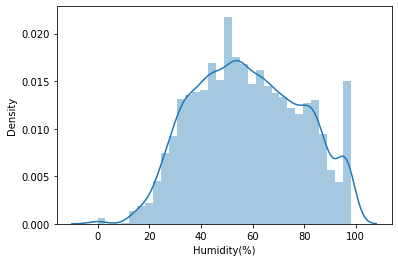

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


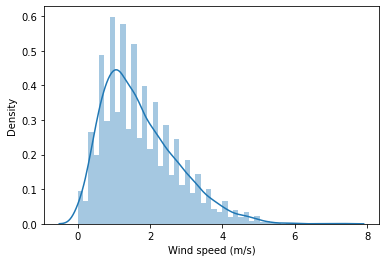

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


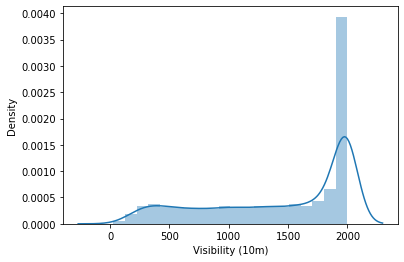

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


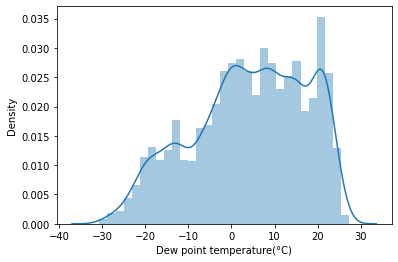

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


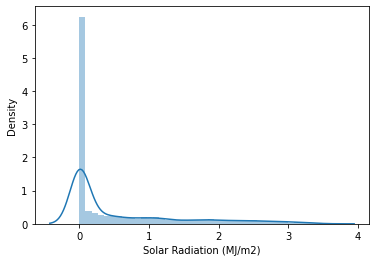

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


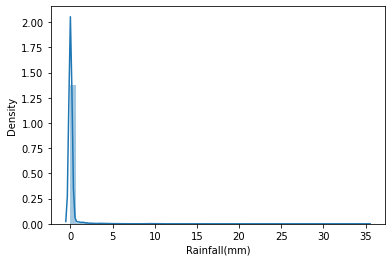

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


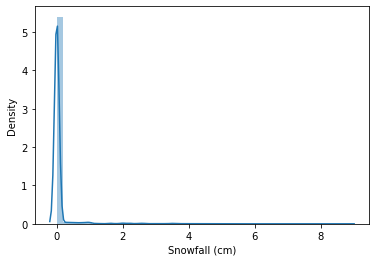

In [95]:
for i in range(0,10):
    sns.distplot(cont_var.iloc[:,i])
    plt.show()

In [96]:
df=pd.get_dummies(data,columns=['Holiday','Functioning Day','Hour'])

In [97]:
df.head()

,Date,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,01-12-2017,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,01-12-2017,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,01-12-2017,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,01-12-2017,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,01-12-2017,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
del df['Holiday_No Holiday']

In [99]:
del df['Functioning Day_No']

In [100]:
df=df.rename(columns={'Holiday_Holiday':'Holiday','Functioning Day_Yes':'Functioning_day'})

In [101]:
df=df.rename(columns={'Temperature(°C)':'Temperature','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

In [102]:
df.columns

Index(['Date', 'Rented Bike Count', 'Temperature', 'Humidity(%)', 'Wind speed',
       'Visibility', 'Dew point temperature', 'Radiation', 'Rainfall(mm)',
       'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning_day', 'Hour_0',
       'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7',
       'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23'],
      dtype='object')

In [103]:
del df['Date']

In [104]:
#del df['Hour']

In [105]:
df.head()

,Rented Bike Count,Temperature,Humidity(%),Wind speed,Visibility,Dew point temperature,Radiation,Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning_day,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


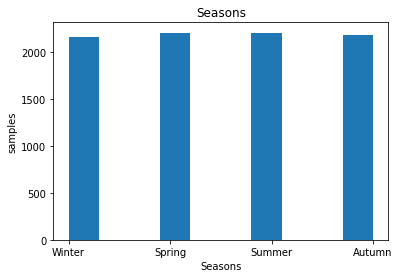

In [106]:
plt.hist(data.Seasons)
plt.title('Seasons')
plt.xlabel('Seasons')
plt.ylabel('samples')
plt.show()

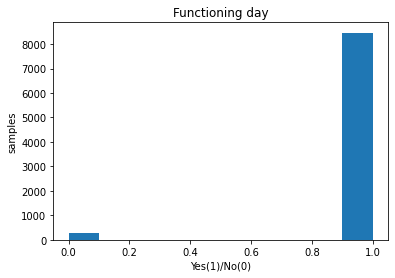

In [107]:
plt.hist(df.Functioning_day)
plt.title('Functioning day')
plt.xlabel('Yes(1)/No(0)')
plt.ylabel('samples')
plt.show()

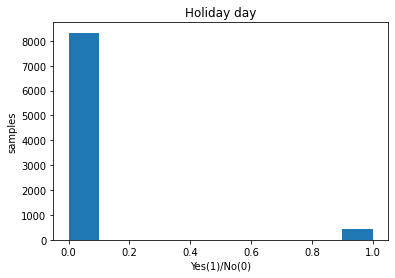

In [108]:
plt.hist(df.Holiday)
plt.title('Holiday day')
plt.xlabel('Yes(1)/No(0)')
plt.ylabel('samples')
plt.show()

In [109]:
X=df.iloc[:,1:].values

In [110]:
y=df.iloc[:,0].values

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=X[:,-3])

In [113]:
y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)

In [114]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[8])],remainder='passthrough')
X_train=np.array(ct.fit_transform(X_train))
X_test=np.array(ct.transform(X_test))

In [115]:
from sklearn.preprocessing import PowerTransformer

In [116]:
sc_X=PowerTransformer(method = 'yeo-johnson')
sc_Y=PowerTransformer(method = 'yeo-johnson')

In [117]:
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


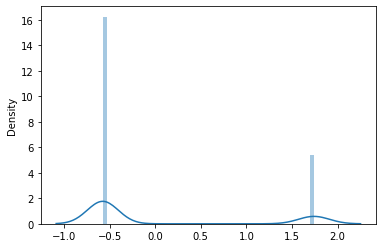

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


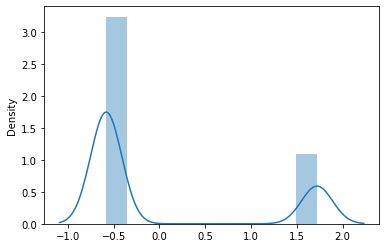

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


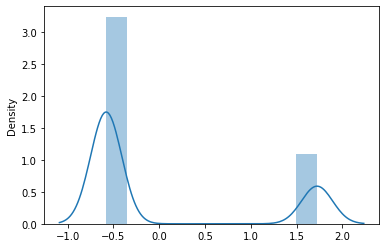

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


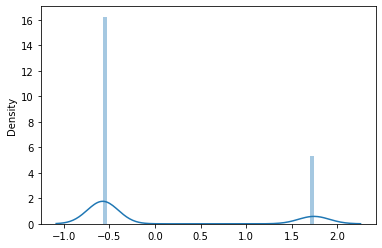

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


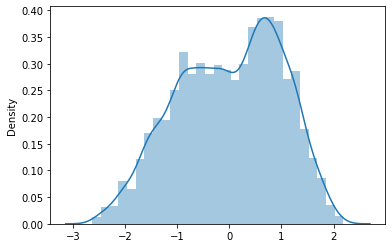

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


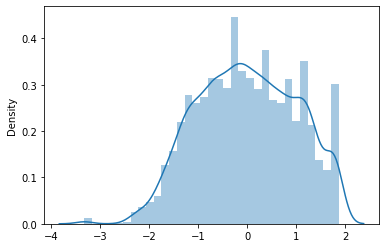

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


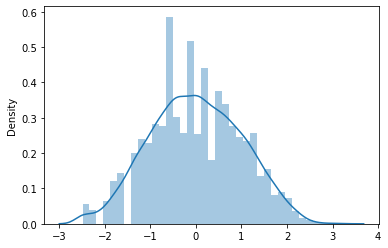

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


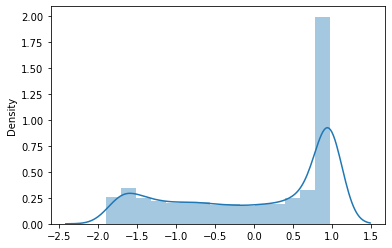

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


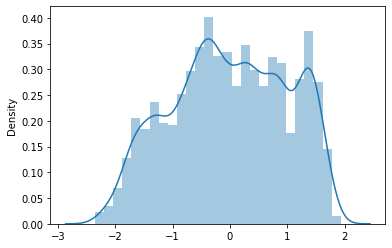

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


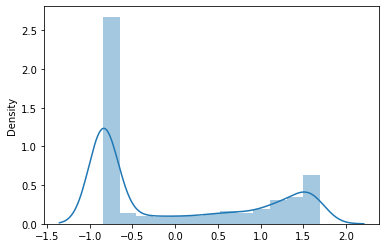

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


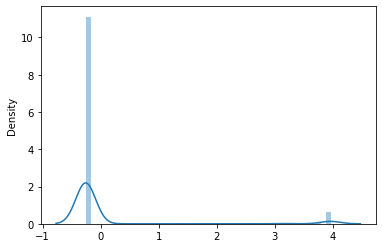

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


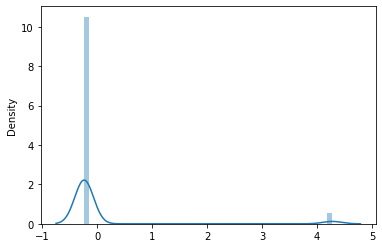

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


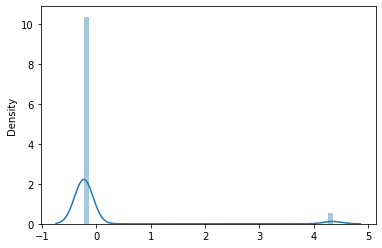

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


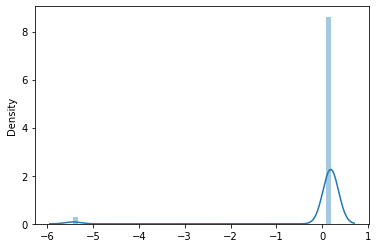

In [118]:
for i in range(0,14):
    sns.distplot(X_train[:,i])
    plt.show()

In [119]:
y_train=sc_Y.fit_transform(y_train)
y_test=sc_Y.transform(y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


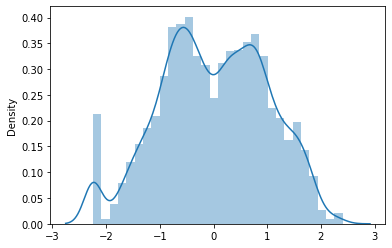

In [120]:
sns.distplot(y_train)

## Linear Regression

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
model1=LinearRegression()

In [123]:
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
from sklearn.metrics import r2_score

In [125]:
y_pred1=model1.predict(X_test)

In [126]:
rscore1=r2_score(y_test,y_pred1)

In [127]:
rscore1

0.8052383806197492

In [128]:
import statsmodels.api as sm
lin_reg=sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.808
Method:                 Least Squares   F-statistic:                              819.5
Date:                Sun, 31 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:03:43   Log-Likelihood:                         -4145.8
No. Observations:                7008   AIC:                                      8364.
Df Residuals:                    6972   BIC:                                      8610.
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          6.858e+09   1.73e+11      0.040      0.968   -3.33e+11    3.47e+11
x2          6.896e+09   1.74e+11      0.040      0.968   -3.35e+11    3.49e+11
x3          6.892e+09   1.74e+11      0.040      0.968   -3.35e+11    3.49e+11
x4          6.854e+09   1.73e+11      0.040      0.968   -3.33e+11    3.47e+11
x5             0.5386      0.042     12.960      0.000       0.457       0.620
x6            -0.0379      0.020     -1.853      0.064      -0.078       0.002
x7            -0.0131      0.006     -2.109      0.035      -0.025      -0.001
x8             0.0125      0.007      1.821      0.069      -0.001       0.026
x9            -0.2013      0.047     -4.273      0.000      -0.294      -0.109
x10            0.2238      0.016     14.239      0.000       0.193       0.255
x11           -0.2612      0.006    -44.229      0.000      -0.273      -0.250
x12            0.0035      0.006      0.612      0.540      -0.008       0.015
x13           -0.0505      0.005     -9.512      0.000      -0.061      -0.040
x14            0.4690      0.005     86.378      0.000       0.458       0.480
x15        -3.331e+08   8.42e+09     -0.040      0.968   -1.68e+10    1.62e+10
x16        -3.399e+08   8.59e+09     -0.040      0.968   -1.72e+10    1.65e+10
x17        -3.314e+08   8.38e+09     -0.040      0.968   -1.68e+10    1.61e+10
x18        -3.432e+08   8.68e+09     -0.040      0.968   -1.74e+10    1.67e+10
x19        -3.421e+08   8.65e+09     -0.040      0.968   -1.73e+10    1.66e+10
x20        -3.454e+08   8.73e+09     -0.040      0.968   -1.75e+10    1.68e+10
x21        -3.331e+08   8.42e+09     -0.040      0.968   -1.68e+10    1.62e+10
x22        -3.449e+08   8.72e+09     -0.040      0.968   -1.74e+10    1.67e+10
x23        -3.449e+08   8.72e+09     -0.040      0.968   -1.74e+10    1.67e+10
x24        -3.388e+08   8.57e+09     -0.040      0.968   -1.71e+10    1.65e+10
x25        -3.399e+08   8.59e+09     -0.040      0.968   -1.72e+10    1.65e+10
x26        -3.399e+08   8.59e+09     -0.040      0.968   -1.72e+10    1.65e+10
x27        -3.416e+08   8.64e+09     -0.040      0.968   -1.73e+10    1.66e+10
x28        -3.388e+08   8.57e+09     -0.040      0.968   -1.71e+10    1.65e+10
x29        -3.438e+08   8.69e+09     -0.040      0.968   -1.74e+10    1.67e+10
x30        -3.416e+08   8.64e+09     -0.040      0.968   -1.73e+10    1.66e+10
x31        -3.354e+08   8.48e+09     -0.040      0.968    -1.7e+10    1.63e+10
x32        -3.377e+08   8.54e+09     -0.040      0.968   -1.71e+10    1.64e+10
x33        -3.399e+08   8.59e+09     -0.040      0.968   -1.72e+10    1.65e+10
x34        -3.416e+08   8.64e+09     -0.040      0.968   -1.73e+10    1.66e+10
x35        -3.416e+08   8.64e+09     -0.040      0.968   -1.7

##  Polynomial Regression

In [129]:
from sklearn.preprocessing import PolynomialFeatures

In [130]:
poly_reg=PolynomialFeatures(degree=2)
#X_poly=poly_reg.fit_transform(X_train)
model2=LinearRegression()
model2.fit(poly_reg.fit_transform(X_train),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
y_pred2=model2.predict(poly_reg.fit_transform(X_test))

In [132]:
rscore2=r2_score(y_test,y_pred2)

In [133]:
rscore2

0.8830555903561551

In [134]:
import statsmodels.api as sm
lin_reg=sm.OLS(y_train,poly_reg.fit_transform(X_train)).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     154.5
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:04:07   Log-Likelihood:                -1721.0
No. Observations:                7008   AIC:                             4252.
Df Residuals:                    6603   BIC:                             7028.
Df Model:                         404                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.114e+10   2.52e+10      1.635      0.102   -8.19e+09    9.05e+10
x1            7.1e+10   4.34e+10      1.635      0.102   -1.41e+10    1.56e+11
x2         -1.797e+10    1.1e+10     -1.635      0.102   -3.95e+10    3.58e+09
x3          -1.61e+11   9.85e+10     -1.635      0.102   -3.54e+11     3.2e+10
x4          1.542e+11   9.43e+10      1.635      0.102   -3.07e+10    3.39e+11
x5            -0.6115      0.154     -3.971      0.000      -0.913      -0.310
x6            -0.4250      0.071     -6.019      0.000      -0.563      -0.287
x7            -0.0187      0.005     -3.688      0.000      -0.029      -0.009
x8             0.0244      0.007      3.600      0.000       0.011       0.038
x9             0.8533      0.174      4.909      0.000       0.513       1.194
x10         7.741e+09   4.73e+09      1.635      0.102   -1.54e+09     1.7e+10
x11            0.1160      0.072      1.608      0.108      -0.025       0.258
x12        -1.072e+11   6.56e+10     -1.635      0.102   -2.36e+11    2.13e+10
x13        -6.643e+10   4.06e+10     -1.635      0.102   -1.46e+11    1.32e+10
x14        -6.782e+10   4.15e+10     -1.635      0.102   -1.49e+11    1.35e+10
x15        -2.411e+11   1.47e+11     -1.635      0.102    -5.3e+11     4.8e+10
x16        -9.612e+08   5.88e+08     -1.635      0.102   -2.11e+09    1.91e+08
x17         3.575e+10   2.19e+10      1.635      0.102   -7.11e+09    7.86e+10
x18         9.469e+10   5.79e+10      1.635      0.102   -1.88e+10    2.08e+11
x19         -5.55e+10   3.39e+10     -1.635      0.102   -1.22e+11     1.1e+10
x20        -3.355e+10   2.05e+10     -1.635      0.102   -7.38e+10    6.68e+09
x21         4.747e+10    2.9e+10      1.635      0.102   -9.45e+09    1.04e+11
x22        -3.566e+10   2.18e+10     -1.635      0.102   -7.84e+10     7.1e+09
x23         -2.03e+10   1.24e+10     -1.635      0.102   -4.46e+10    4.04e+09
x24         1.737e+10   1.06e+10      1.635      0.102   -3.46e+09    3.82e+10
x25        -2.761e+10   1.69e+10     -1.635      0.102   -6.07e+10    5.49e+09
x26         5.709e+10   3.49e+10      1.635      0.102   -1.14e+10    1.26e+11
x27         3.874e+09   2.37e+09      1.635      0.102   -7.71e+08    8.52e+09
x28         5.601e+09   3.43e+09      1.635      0.102   -1.11e+09    1.23e+10
x29        -1.156e+11   7.07e+10     -1.635      0.102   -2.54e+11     2.3e+10
x30        -2.754e+09   1.68e+09     -1.635      0.102   -6.06e+09    5.48e+08
x31         5.176e+10   3.17e+10      1.635      0.102   -1.03e+10    1.14e+11
x32         6.417e+10   3.93e+10      1.635      0.102   -1.28e+10    1.41e+11
x33         2.783e+10    1.7e+10      1.635      0.102   -5.54e+09    6.12e+10
x34        -8.432e+09   5.16e+09     -1.635      0.102   -1.85e+10    1.68e+09
x35         1.422e+10    8.7e+09      1.635      0.102   -2.83e+09    3.13e+10
x3

## Decision Tree Regression 

In [135]:
from sklearn.tree import DecisionTreeRegressor
model3=DecisionTreeRegressor()
model3.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [136]:
y_pred3=model3.predict(X_test)

In [137]:
rscore3=r2_score(y_test,y_pred3)

In [138]:
rscore3

0.7862540704455369

## Random Forest Regression 

In [139]:
from sklearn.ensemble import RandomForestRegressor

In [140]:
model4=RandomForestRegressor(n_estimators=10,random_state=0)
model4.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [141]:
y_pred4=model4.predict(X_test)

In [142]:
rscore4=r2_score(y_test,y_pred4)

In [143]:
rscore4

0.8869648843442582

## Bagging Regressor

In [144]:
from sklearn.ensemble import BaggingRegressor
model5= BaggingRegressor(model4,random_state=0)
model5.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=10,
                                  

In [145]:
y_pred5=model5.predict(X_test)

In [146]:
rscore5=r2_score(y_test,y_pred5)

In [147]:
rscore5

0.8997924047290609

## Stacking Regressor

In [148]:
estimators=[('linear regression',model1),('Decision Tree',model3),('ploy regression',model2),('random forest',model4),('bagging',model5)]

In [149]:
from sklearn.ensemble import StackingRegressor
stack_reg=StackingRegressor(estimators=estimators,final_estimator=model1,passthrough=True)

In [150]:
stack_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingRegressor(cv=None,
                  estimators=[('linear regression',
                               LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False)),
                              ('Decision Tree',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     m

In [151]:
y_pred6=stack_reg.predict(X_test)

In [152]:
rscore6=r2_score(y_test,y_pred6)

In [153]:
rscore6

0.9029697491675588

###  Accuracy Table

In [154]:
data={'Model':['Linear Regression','Polynomial Regression','Decision Tree Regressor','Random Forest Regressor','Bagging Regressor','Stacking Regressor'],'R_Score':[rscore1,rscore2,rscore3,rscore4,rscore5,rscore6]}

In [155]:
Accuracy_Table=pd.DataFrame(data)

In [156]:
Accuracy_Table['Rank']=Accuracy_Table['R_Score'].rank(axis=0,ascending=False)

In [157]:
Accuracy_Table

,Model,R_Score,Rank
0,Linear Regression,0.805238,5.0
1,Polynomial Regression,0.883056,4.0
2,Decision Tree Regressor,0.786254,6.0
3,Random Forest Regressor,0.886965,3.0
4,Bagging Regressor,0.899792,2.0
5,Stacking Regressor,0.902970,1.0
